# Analysis

In [1]:
from sympy import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
init_printing()

In [2]:
def nullstellen2d(f):
    glg = Eq(f)
    Lsg = solve(glg)
    return Lsg

def nullstellenpunkte2d(f):
    Lsg = nullstellen2d(f)
    if(not type(Lsg) is list):
        candidates = []
    output = []
    for lsg in Lsg:
        output.append((lsg,0))
    return output

In [3]:
def plot2d(f, a, b):
    plt.figure()
    plt.grid()
    fn = lambdify(x, f, 'numpy')
    xn = np.linspace(a,b,100)
    plt.plot(xn, fn(xn))
    
def plot2d_scharen(f, a, b, parameters):
    plt.figure()
    plt.grid()
    for par in parameters:
        fp = f.subs(c, par)
        fpn = lambdify(x, fp, 'numpy')
        xn = np.linspace(a, b, 100)
        plt.plot(xn, fpn(xn))
        

def schnittpunkte(f,g):
    glg = Eq(f,g)
    stellen = solve(glg,x)
    lsg = []
    xn = np.linspace(-2,2)
    fn = lambdify(x, f, 'numpy')
    gn = lambdify(x, g, 'numpy')
    plt.grid()
    plt.plot(xn, fn(xn))
    plt.plot(xn, gn(xn))
    for cand in stellen:
        plt.plot(cand,f.subs(x,cand), "r.")
        lsg.append((cand,f.subs(x,cand)))
    return lsg


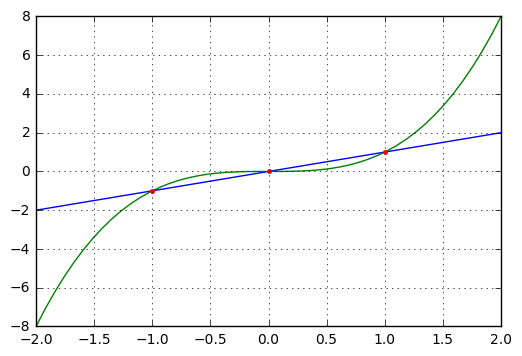

In [4]:
x = Symbol('x')
f = x
g = x**3
schnittpunkte(f,g)

In [5]:
def hochpunkte2d(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    glg = Eq(f1)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    if(not type(candidates) is list):
        candidates = []
    for cand in candidates:
        if(f2.subs(x,cand) < 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f2.subs(x,cand) == 0):
            wert = f.subs(x,cand)
            if(f.subs(x, cand - epsilon) < wert and f.subs(x, cand + epsilon) < wert):
                lsg.append((cand, wert))
    return lsg

In [6]:
def tiefpunkte2d(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    glg = Eq(f1)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    if(not type(candidates) is list):
        candidates = []
    for cand in candidates:
        if(f2.subs(x,cand) > 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f2.subs(x,cand) == 0):
            wert = f.subs(x,cand)
            if(f.subs(x, cand - epsilon) > wert and f.subs(x, cand + epsilon) > wert):
                lsg.append((cand, wert))
    return lsg

In [7]:
def wendepunkte2d(f):
    f1 = f.diff(x)
    f2 = f1.diff(x)
    f3 = f2.diff(x)
    glg = Eq(f2)
    candidates = solve(glg)
    lsg = []
    epsilon = 10**-16
    if(not type(candidates) is list):
        candidates = []
    for cand in candidates:
        if(not f3.subs(x,cand) == 0):
            lsg.append((cand, f.subs(x,cand)))
        elif(f3.subs(x,cand) == 0):
            wert = f1.subs(x,cand)
            cond1 = f1.subs(x, cand - epsilon) > wert and f1.subs(x, cand + epsilon) > wert
            cond2 = f1.subs(x, cand - epsilon) < wert and f1.subs(x, cand + epsilon) < wert
            if(cond1 or cond2):
                lsg.append((cand, wert))
    return lsg

In [8]:
def plotHochpunkte2d(f, a, b):
    plot2d(f, a, b)
    plotHochpunkte2d_seperat(f, a, b)
    
def plotHochpunkte2d_seperat(f, a, b):
    hochpkt = np.array(hochpunkte2d(f))
    if(len(hochpkt) == 0):
        return
    a = np.minimum(np.min(hochpkt[:, 0]), a)
    b = np.maximum(np.max(hochpkt[:, 0]), b)
    plt.plot(hochpkt[:, 0], hochpkt[:, 1], ".g", label = 'Hochpunkt')
    plt.legend()
    
def plotHochpunkte2d_scharen(f, a, b, parameters):
    plot2d_scharen(f, a, b, parameters)
    for par in parameters:
        fp = f.subs(c, par)
        plotHochpunkte2d_seperat(fp, a, b)
    
def plotTiefpunkte2d(f, a, b):
    plot2d(f, a, b)
    plotTiefpunkte2d_seperat(f, a, b)
    
def plotTiefpunkte2d_seperat(f, a, b):
    tiefpkt = np.array(tiefpunkte2d(f))
    if(len(tiefpkt) == 0):
        return
    a = np.minimum(np.min(tiefpkt[:, 0]), a)
    b = np.maximum(np.max(tiefpkt[:, 0]), b)
    plt.plot(tiefpkt[:, 0], tiefpkt[:, 1], ".r", label = 'Tiefpunkt')
    plt.legend()
    
def plotTiefpunkte2d_scharen(f, a, b, parameters):
    plot2d_scharen(f, a, b, parameters)
    for par in parameters:
        fp = f.subs(c, par)
        plotTiefpunkte2d_seperat(fp, a, b)
    
    
def plotExtrempunkte2d(f, a, b):
    plot2d(f, a, b)
    plotHochpunkte2d_seperat(f, a, b)
    plotTiefpunkte2d_seperat(f, a, b)
    
def plotExtrempunkte2d_scharen(f, a, b, parameters):
    plot2d_scharen(f, a, b, parameters)
    for par in parameters:
        fp = f.subs(c, par)
        plotTiefpunkte2d_seperat(fp, a, b)
        plotHochpunkte2d_seperat(fp, a, b)
    
def plotWendepunkte2d(f, a, b):
    plot2d(f, a, b)
    plotWendepunkte2d_seperat(f, a, b)

    
def plotWendepunkte2d_seperat(f, a, b):
    wendepkt = np.array(wendepunkte2d(f))
    if(len(wendepkt) == 0):
        return
    a = np.minimum(np.min(wendepkt[:, 0]), a)
    b = np.maximum(np.max(wendepkt[:, 0]), b)
    plt.plot(wendepkt[:, 0], wendepkt[:, 1], ".k", label = 'Wendepunkt')
    plt.legend()
    

def plotWendepunkte2d_scharen(f, a, b, parameters):
    plot2d_scharen(f, a, b, parameters)
    for par in parameters:
        fp = f.subs(c, par)
        plotWendepunkte2d_seperat(fp, a, b)
    
def plotNullstellen2d(f, a, b):
    nst = np.array(nullstellenpunkte2d(f))
    if(len(nst) == 0):
        return
    a = np.minimum(np.min(nst[:, 0]), a)
    b = np.maximum(np.max(nst[:, 0]), b)
    plot2d(f, a, b)
    plt.plot(nst[:, 0], nst[:, 1], ".r", label = 'Nullstelle')
    plt.legend()

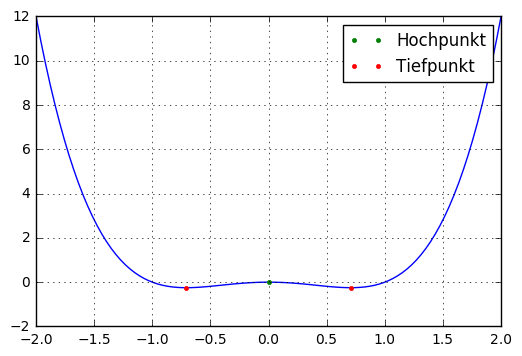

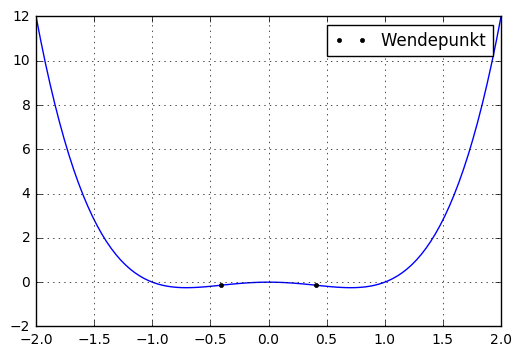

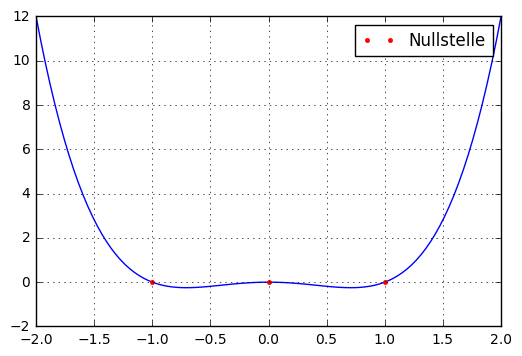

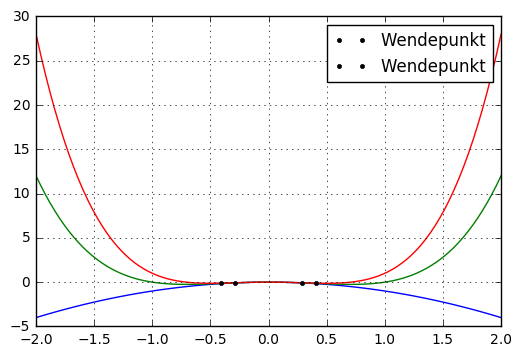

In [9]:
x = Symbol('x', real = True)
c = Symbol('c')
f = x**4-x**2
g = c*x**4-x**2
plotExtrempunkte2d(f, -2, 2)
plotWendepunkte2d(f, -2, 2)
plotNullstellen2d(f, -2, 2)
plotWendepunkte2d_scharen(g, -2, 2, [0, 1, 2])

In [10]:
def jacobianMatrix(f, var):
    M = Matrix([f])
    return M.jacobian(var)


In [11]:
def gradient(f, var):
    if(Matrix([f]).shape[0] > 1 and Matrix([f]).shape[1] > 1):
        raise(Exception("Gradient nicht zu bestimmen"))
    return jacobianMatrix(f,var).T

In [12]:
#Hesse Matrix direkt zu bestimmen durch Sympy
#Jordan Zerlegung durch Sympy direkt zu bestimmen
#partielle Ableitungen sind die Eintraege der Jacobi Matrix
#Ableitung direkt zu bestimmen
#Riemann-Integral direkt zu bestimmen
#Grenzwerte von Folgen und Reihen direkt zu bestimmen
#Taylor Polynom direkt zu bestimmen

In [13]:
def plot3d(f, xintervall, yintervall):
    fig = plt.figure()
    fn = lambdify((x,y), f, 'numpy')
    xn = np.linspace(xintervall[0], xintervall[1], 50)
    yn = np.linspace(yintervall[0], yintervall[1], 50)
    X,Y = np.meshgrid(xn,yn)
    Z = fn(X,Y)
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap = plt.cm.viridis)

In [14]:
y = Symbol('y', real = True)

def hochpunkte3d(f, var):
    f1 = gradient(f, var)
    f2 = simplify(hessian(f, var))
    gls = set(f1)
    candidates = solve(gls)
    lsg = []
    if(type(candidates) is list):
        for cand in candidates:
            definitheit = negativDefinit(f2.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]]))
            if(definitheit):
                lsg.append((cand[var[0]], cand[var[1]], f.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]])))
    elif(type(candidates) is set):
        definitheit = negativDefinit(f2.subs(var[0] ,candidates[var[0]]).subs(var[1], candidates[var[1]]))
        if(definitheit):
            lsg.append((candidates[var[0]], candidates[var[1]], 
                        f.subs(var[0] ,candidates[var[0]]).subs(var[1], candidates[var[1]])))
    return lsg

def tiefpunkte3d(f, var):
    f1 = gradient(f, var)
    f2 = simplify(hessian(f, var))
    gls = set(f1)
    candidates = solve(gls)
    lsg = []
    if(type(candidates) is list):
        for cand in candidates:
            definitheit = positivDefinit(f2.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]]))
            if(definitheit):
                lsg.append((cand[var[0]], cand[var[1]], f.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]])))
    elif(type(candidates) is set):
        definitheit = positivDefinit(f2.subs(var[0] ,candidates[var[0]]).subs(var[1], candidates[var[1]]))
        if(definitheit):
            lsg.append((candidates[var[0]], candidates[var[1]], 
                        f.subs(var[0] ,candidates[var[0]]).subs(var[1], candidates[var[1]])))
    return lsg

def sattelpunkte3d(f, var):
    f1 = gradient(f, var)
    f2 = simplify(hessian(f, var))
    gls = set(f1)
    candidates = solve(gls)
    lsg = []
    if(type(candidates) is list):
        for cand in candidates:
            definitheit = indefinit(f2.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]]))
            if(definitheit):
                lsg.append((cand[var[0]], cand[var[1]], f.subs(var[0] ,cand[var[0]]).subs(var[1], cand[var[1]])))
    elif(type(candidates) is set):
        definitheit = indefinit(f2.subs(var[0] ,candidates[var[0]]).subs(var[1], candidates[var[1]]))
        if(definitheit):
            lsg.append((candidates[var[0]], candidates[var[1]], 
                        f.subs(var[0] ,candidates[var[0]]).subs(var[1], candidates[var[1]])))
    return lsg

In [15]:
def positivDefinit(M):
    eigenwerte = M.eigenvals()
    result = True
    for eig in eigenwerte:
        if(eig <= 0):
            result = False
            break
    return result

def negativDefinit(M):
    eigenwerte = M.eigenvals()
    result = True
    for eig in eigenwerte:
        if(eig >= 0):
            result = False
            break
    return result

def indefinit(M):
    eigenwerte = list(M.eigenvals().keys())
    if(np.min(eigenwerte) < 0 and np.max(eigenwerte) > 0):
        return True
    return False

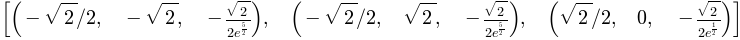

In [16]:
y = Symbol('y', real = True)
f = x*(y**2 - 1)*exp(-x**2-y**2)
tiefpunkte3d(f, [x,y])
#Fehler bei semidefiniten Matrizen

In [17]:
def plotHochpunkte3d(f, a, b, var):
    plot3d(f, a, b)
    plotHochpunkte3d_seperat(f, a, b, var)

    
def plotHochpunkte3d_seperat(f, a, b, var):
    hochpkt = np.array(hochpunkte3d(f, var))
    if(len(hochpkt) == 0):
        return
    plt.plot(hochpkt[:, 0], hochpkt[:, 1], hochpkt[:, 2], ".r", label = 'Hochpunkt')
    plt.grid()
    plt.legend()
    
def plotTiefpunkte3d(f, a, b, var):
    plot3d(f, a, b)
    plotTiefpunkte3d_seperat(f, a, b, var)

    
def plotTiefpunkte3d_seperat(f, a, b, var):
    tiefpkt = np.array(tiefpunkte3d(f, var))
    if(len(tiefpkt) == 0):
        return
    plt.plot(tiefpkt[:, 0], tiefpkt[:, 1], tiefpkt[:, 2], ".y", label = 'Tiefpunkt')
    plt.grid()
    plt.legend()
    
def plotSattelpunkte3d(f, a, b, var):
    sattelpkt = np.array(sattelpunkte3d(f, var))
    if(len(sattelpkt) == 0):
        return
    plot3d(f, a, b)
    plt.plot(sattelpkt[:, 0], sattelpkt[:, 1], sattelpkt[:, 2], ".b", label = 'Sattelpunkt')
    plt.grid()
    plt.legend()
    
def plotExtrempunkte3d(f, a, b, var):
    plot3d(f, a, b)
    plotTiefpunkte3d_seperat(f, a, b, var)
    plotHochpunkte3d_seperat(f, a, b, var)
    

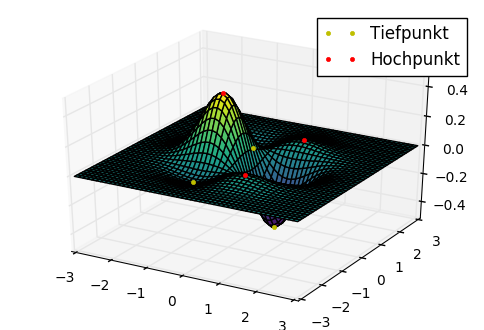

In [18]:
f = x*(y**2 - 1)*exp(-x**2-y**2)
plotExtrempunkte3d(f, [-3, 3], [-3, 3], [x,y])

In [19]:
def getDgl(ordnung, glg):
    y = Function('y')
    return Eq(y(x).diff(x,ordnung), glg)

def solveDgl(ordnung, glg):
    return dsolve(getDgl(ordnung, glg))

def solveDglAWA(ordnung, glg, x0, y0):
    Lsg = solveDgl(ordnung, glg)
    result = []
    if(type(Lsg) is Equality):
        Lsg = [Lsg]
    for lsg in Lsg:
        coeff = Eq(lsg.rhs.subs(x, x0), y0)
        lsgCoeff = solve(coeff)
        for c in lsgCoeff:
            if(type(c) is dict):
                result.append(lsg.subs(c).simplify())
            else:
                C1 = Symbol('C1')
                result.append(lsg.subs(C1,c).simplify())
    return list(set(result))

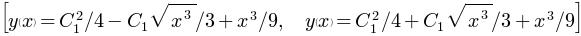

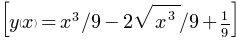

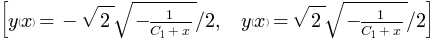

In [20]:
y = Function('y')
display(solveDgl(1, sqrt(x*y(x))))
display(solveDglAWA(1, sqrt(x*y(x)), 1, 0))
display(solveDglAWA(1, exp(x), 1, 0))
display(solveDglAWA(2, exp(x) + sin(x), 0, 1))
display(solveDgl(1, y(x)**3))

In [21]:
def plotPhasenportrait(ordnung, glg, xintervall, yintervall):
    plt.figure()
    dgl = getDgl(ordnung, glg)
    xn = np.linspace(xintervall[0], xintervall[1], 20)
    yn = np.linspace(yintervall[0], yintervall[1], 20)
    werte = np.array([dgl.rhs.subs({x: xx, y(x):yy}) for yy in yn for xx in xn]).reshape(20,20).astype(float)
    X,Y = np.meshgrid(xn,yn)
    plt.quiver(X, Y, np.ones_like(X), werte, angles = 'xy')
    
def plotAWA(ordnung, glg, w, xintervall, yintervall):
    plotPhasenportrait(ordnung, glg, xintervall, yintervall)
    intervall = np.linspace(xintervall[0], xintervall[1], 100)
    for awa in w:
        Lsg = solveDglAWA(ordnung, glg, awa[0], awa[1])
        fn = lambdify(x, Lsg[0].rhs, 'numpy')
        plt.plot(intervall, fn(intervall))
    plt.xlim(xintervall[0], yintervall[1])
    plt.ylim(yintervall[0], yintervall[1])

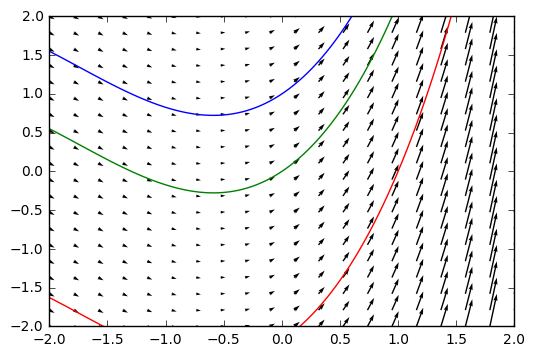

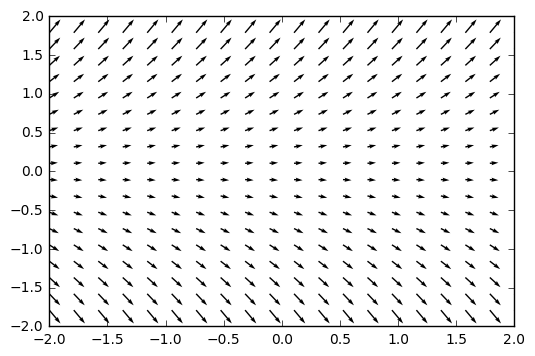

In [22]:
plotAWA(1, exp(x) + sin(x),[(0,1), (0,0), (1,0)], [-2,2], [-2,2])
plotPhasenportrait(2, y(x), [-2,2], [-2,2]) 
#Fehler bei Nicht-Eindeutigkeit der Loesungen

# Lineare Algebra

In [23]:
def solveGlg(glgs, lsg):
    i = 0
    gls = []
    for i in range(len(glgs)):
        gls.append(Eq(glgs[i], lsg[i]))
    gls = set(gls)
    Lsg = solve(gls)
    return Lsg

def solveGlgMatrix(M, b):
    y = Matrix([Symbol('y_' + str(j+1)) for j in range(M.shape[1])])
    return solve(Eq(M*y, b))

def lineare_unabhaengigkeit(vektoren):
    if(len(vektoren) > len(vektoren[0])):
        return False
    matrices = []
    for vect in vektoren:
        matrices.append(vect.T)
    M = Matrix(matrices).T
    y = Matrix([Symbol('y_' + str(j+1)) for j in range(M.shape[1])])
    b = Matrix([0 for j in range(M.shape[0])])
    Lsg = solve(Eq(M*y, b))
    result = True
    if(len(Lsg[0]) < len(y)):
        return False
    for component in y:
        if(Lsg[0][component] != 0):
            result = False
    return result

True

False

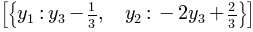

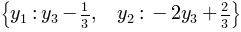

In [24]:
M = Matrix([[1,2,3],[4,5,6],[7,8,9]])
b = Matrix([1,2,3])
display(lineare_unabhaengigkeit([Matrix([1,0,0]), Matrix([0, 1, 0]), Matrix([0,0,1])]))
display(lineare_unabhaengigkeit([Matrix([1,0,0]), Matrix([1, 0, 1]), Matrix([0,0,1])]))
display(solveGlgMatrix(M,b))
y = Matrix([Symbol('y_' + str(j+1)) for j in range(M.shape[1])])
display(solveGlg(list(M*y),b))

In [25]:
#Matrix, Vektorrechnung, Normen, Skalarprodukt direkt anwendbar
#Determinante und Rang der Matrix direkt anwendbar (ohne Parameter)

In [26]:
def angle(v1, v2):
    return acos((v2.T * v1).det()/(v1.norm(2) * v2.norm(2)))*360/(2*pi)

In [27]:
angle(Matrix([1,0,0]), Matrix([1, 1, 0]))

In [28]:
def MatrixFromVectors(vektoren):
    vects = []
    for vect in vektoren:
        vects.append(vect.T)
    return Matrix(vects).T

def GramSchmidt(vektoren):
    M = MatrixFromVectors(vektoren)
    Q,R = M.QRdecomposition()
    result = []
    for j in range(Q.shape[0]):
        result.append(Q[:,j])
    return result

In [29]:
M = [Matrix([3,4,7]), Matrix([2,5,8]), Matrix([3,6,9])]
GramSchmidt(M)

⎡⎡3⋅√74⎤  ⎡-49⋅√2923 ⎤  ⎡ 3⋅√158 ⎤⎤
⎢⎢─────⎥, ⎢──────────⎥, ⎢ ────── ⎥⎥
⎢⎢  74 ⎥  ⎢   2923   ⎥  ⎢  158   ⎥⎥
⎢⎢     ⎥  ⎢          ⎥  ⎢        ⎥⎥
⎢⎢2⋅√74⎥  ⎢ 21⋅√2923 ⎥  ⎢ 5⋅√158 ⎥⎥
⎢⎢─────⎥  ⎢ ──────── ⎥  ⎢ ────── ⎥⎥
⎢⎢  37 ⎥  ⎢   2923   ⎥  ⎢   79   ⎥⎥
⎢⎢     ⎥  ⎢          ⎥  ⎢        ⎥⎥
⎢⎢7⋅√74⎥  ⎢ 9⋅√2923  ⎥  ⎢-7⋅√158 ⎥⎥
⎢⎢─────⎥  ⎢ ───────  ⎥  ⎢────────⎥⎥
⎣⎣  74 ⎦  ⎣   2923   ⎦  ⎣  158   ⎦⎦

In [30]:
def ggT(a,b):
    while(not b == 0):
        h = a % b
        a = b
        b = h
    return a

In [31]:
ggT(36, 500)

In [32]:
def dimErzeugendensystem(vektoren):
    if(len(vektoren) == 0):
        return 0
    return MatrixFromVectors(vektoren).rank()

In [33]:
dimErzeugendensystem([Matrix([1,0,1]), Matrix([0, 0, 1]), Matrix([1,0,0])])
#lineare_unabhaengigkeit([Matrix([1,0,0]), Matrix([1, 0, 1]), Matrix([0,0,1])])

In [34]:
def kreuzprodukt(vektoren):
    #TODO: implement
    return 0

In [35]:
def binomial(n, p, anzahl):
    results = list(np.random.binomial(n,p,anzahl))
    haeufigkeit = []
    for i in range(n+1):
        haeufigkeit.append(results.count(i))
    return np.array(haeufigkeit)

def plotBinomial(n, p, anzahl):
    haeufigkeiten = binomial(n,p,anzahl)
    ind = np.arange(len(haeufigkeiten)) + 1
    ax = plt.axes()
    ax.bar(ind, haeufigkeiten)
    ax.set_xlim(0,n)

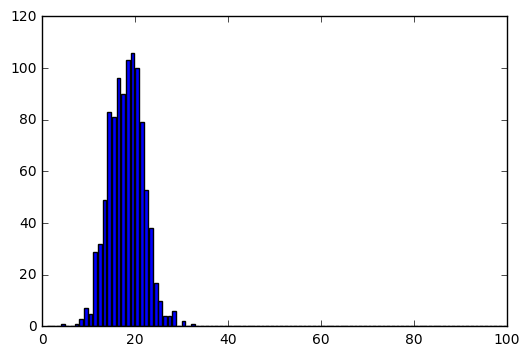

In [36]:
plotBinomial(100, 1/6, 1000)

In [37]:
def normal(mu, var, intervall):
    x = Symbol('x')
    a = Symbol('a')
    sigma = Symbol('sigma')
    f = 1/(sqrt(2*pi*var)) * exp(-(x-a)**2/(2*var))
    fn = lambdify(x, f.subs(a,mu).subs(sigma,var), 'numpy')
    xintervall = np.linspace(intervall[0], intervall[1], 101)
    plt.plot(xintervall, fn(xintervall))

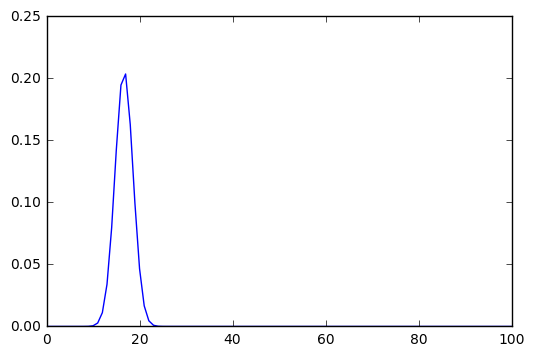

In [38]:
normal(100*1/6, sqrt(100*(1/6)*(5/6)), [0,100])

In [47]:
def istDichtefkt(f, intervall):
    return Integral(f, (x,intervall[0], intervall[1])).n() == 1

In [51]:
x = Symbol('x')
f = 1/(sqrt(2*pi)) * exp(-x**2/2)
istDichtefkt(f, [-oo,oo])

True